In [13]:
#"endpoint" = https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi

import requests
import pandas as pd
import matplotlib.pyplot as plt

def pubmed_search_count(query):
    url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi"
    params = {
        "db": "pubmed",
        "term": query,
        "retmode": "json"
    }
    r = requests.get(url, params=params)
    r.raise_for_status()
    data = r.json()
    return int(data["esearchresult"]["count"])

count = pubmed_search_count("sleep deprivation academic performance students")
print("Total PubMed matches:", count)


Total PubMed matches: 98


In [14]:
# Using the API key to search and collect journals in pubmed that talk about sleep deprivation, academic performance, exercise,
# health and cognition. we then take the data and save it in a dataset for future use.


API_KEY = "b91b6f280974ee50404c3df0337cfa3a7c08"

# Searching PubMed
def pubmed_search(query, retmax=10):
    url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi"
    
    params = {
        "db": "pubmed",
        "term": query,
        "retmax": retmax,
        "retmode": "json",
        "api_key": API_KEY
    }

    r = requests.get(url, params=params)
    data = r.json()
    
    return data["esearchresult"]["idlist"]


# Fetching article data

def pubmed_fetch_details(id_list):
    url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi"
    
    params = {
        "db": "pubmed",
        "id": ",".join(id_list),
        "retmode": "json",
        "api_key": API_KEY
    }

    r = requests.get(url, params=params)
    data = r.json()

    results = []
    for pmid in id_list:
        article = data["result"][pmid]
        results.append({
            "pmid": pmid,
            "title": article.get("title"),
            "journal": article.get("fulljournalname"),
            "pub_date": article.get("pubdate")            
        })

    return results


# Searching the topics
topics = [
    "sleep deprivation academic performance",
    "exercise cognition students",
    "sleep loss memory learning",
    "physical activity mental health academic"
]


all_articles = []

for topic in topics:
    ids = pubmed_search(topic, retmax=15)
    details = pubmed_fetch_details(ids)

    for d in details:
        d["search_topic"] = topic

    all_articles.extend(details)


# Saving CSV
df_pubmed = pd.DataFrame(all_articles)

df_pubmed.to_csv("pubmed_sleep_exercise_articles.csv", index=False)

df_pubmed.head(20)


,pmid,title,journal,pub_date,search_topic
0,41487713,"Sleep Duration, Quality, and Factors Affecting...",Cureus,2025 Dec,sleep deprivation academic performance
1,41413763,Epidemiology and risk factors of migraine and ...,The journal of headache and pain,2025 Dec 18,sleep deprivation academic performance
2,41397579,Decreased top-down attention modulation and co...,Biological psychology,2026 Jan,sleep deprivation academic performance
3,41302674,The Role of Fatigue in the Relationship Betwee...,International journal of environmental researc...,2025 Nov 15,sleep deprivation academic performance
4,41216182,Rest assured: Promoting sleep health in underg...,Sleep medicine: X,2025 Dec 15,sleep deprivation academic performance
5,41072127,Detection of nocturnal epileptic seizures usin...,Computer methods and programs in biomedicine,2026 Jan,sleep deprivation academic performance
6,41018419,Impact of Sleep Deprivation on Cognition and A...,Cureus,2025 Aug,sleep deprivation academic performance
7,40976638,The Reply.,The American journal of medicine,2025 Oct,sleep deprivation academic performance
8,40777666,Prevalence of Sleep Inadequacy Among Badminton...,Cureus,2025 Jul,sleep deprivation academic performance
9,40753283,Clinical utility of self-reported sleep durati...,Diabetologia,2025 Nov,sleep deprivation academic performance


In [12]:
#checking for nan values

df_pubmed.isna().sum()

pmid            0
title           0
journal         0
pub_date        0
search_topic    0
dtype: int64

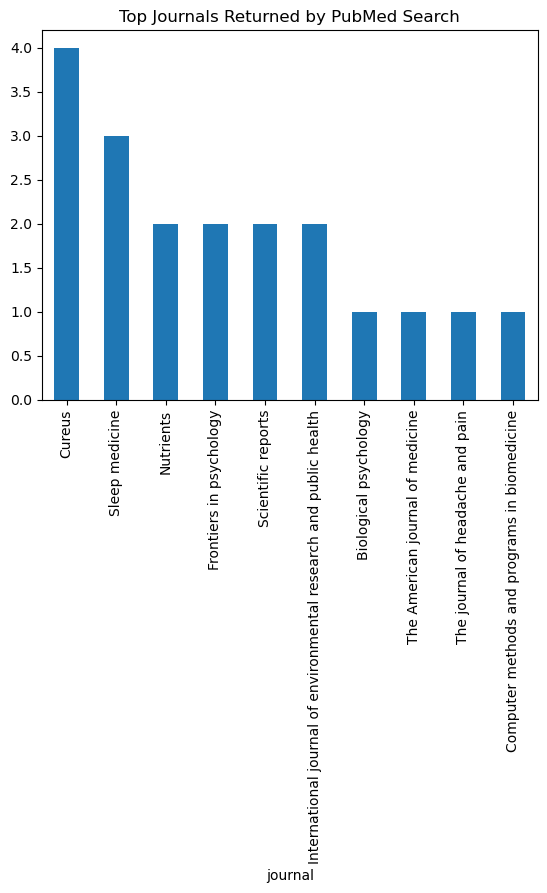

In [15]:
#

df_pubmed["journal"].value_counts().head(10).plot(kind="bar")
plt.title("Top Journals Returned by PubMed Search")
plt.show()


In [8]:
#

def pubmed_search_count(query):
    url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi"
    
    params = {
        "db": "pubmed",
        "term": query,
        "retmode": "json",
        "api_key": API_KEY
    }

    r = requests.get(url, params=params)
    data = r.json()

    return int(data["esearchresult"]["count"])

    topics = [
    "sleep deprivation academic performance",
    "exercise cognition students",
    "sleep loss memory learning",
    "physical activity mental health academic"
]

counts = {}

for topic in topics:
    counts[topic] = pubmed_search_count(topic)

counts

{'sleep deprivation academic performance': 211,
 'exercise cognition students': 1907,
 'sleep loss memory learning': 553,
 'physical activity mental health academic': 1905}

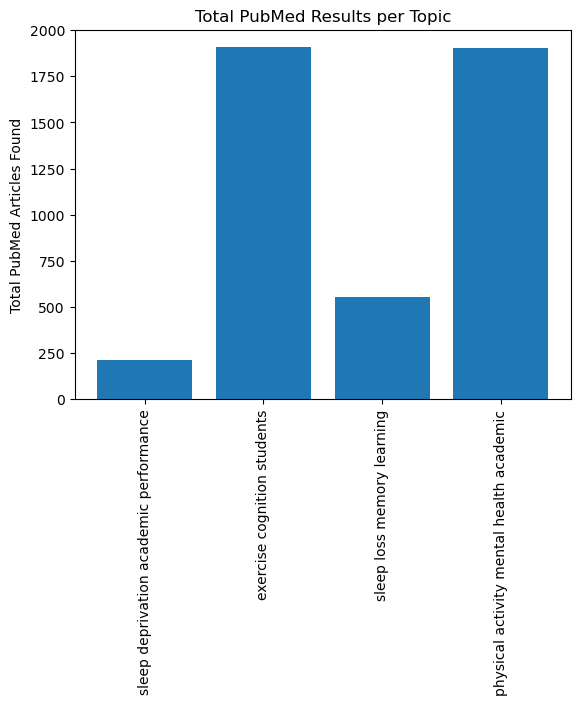

In [16]:

plt.figure()
plt.bar(counts.keys(), counts.values())
plt.xticks(rotation=90)
plt.ylabel("Total PubMed Articles Found")
plt.title("Total PubMed Results per Topic")
plt.show()
